# Zadanie 1

## Wczytywanie potrzebnych bibliotek


In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np


## Ustawianie globalnych danych

#### Ustawiam tutaj, dane które są uniwersalne, dla każdego testu, to znaczy:

1. Liczba stopni swobody
2. Liczba danych
3. Liczba symulacji, które wykonam
4. Poziom istnotności


In [9]:

np.random.seed(seed=123)

# Zakres stopni swobody, jakie zaprezentuję na wykresie
stopnie_swobody = range(1, 50, 1)  # Zakres od 1-50 co 1
# Ustalam poziom istotności
poziom_istotnosci = 0.05
# Liczba danych dla jakich wykonam symulacje
liczby_danych = [10, 20, 50, 100, 200]
# Liczba symulacji na jakich będę bazować
liczba_symulacji = 5000


## Funkcja symulacjii

### Funkcja, która służy wyłącznie do symulacji danego testu 
#### Za argumenty przyjmuje liczbe danych, stopień swobody oraz test dla jakiego ma przeprowadzić symulacje
#### Zwraca odsetek odrzucenia hipotezy zerowej 

In [10]:
def symulacja(l_danych,stopien_s,test):

    # W tej zmiennej będę sumował liczbę razy, gdy dla danego zestawu danych odrzuciłem hipotezę zerową
    suma_odrzucenia_H0 = 0

    for k in range(liczba_symulacji):
        # Tworzę próbkę danych z rozkładu t-Studentao l_danych wielkości i stopien_s stopni swobody
        probka = stats.t.rvs(stopien_s, size=l_danych)

        # Standaryzacja danych
        stand_probka = (probka-np.mean(probka))/np.std(probka)

        # Tutaj jest moment decyzyjny, gdzie decyduje który test teraz symulowany

        # Test Shapiro-Wilka
        if test == "shapiro":
            # Jeżeli pvalue z danego testu jest mniejsze niż wczesniej ustalony poziom istotnotnosci to odrucamy 
            # Hipoteze zerowa co znaczy ze zwiekszamy zmienna sumujaca odrzucenie H0 o 1
            if stats.shapiro(stand_probka).pvalue < poziom_istotnosci:
                suma_odrzucenia_H0 += 1

        # Test Chi-kwadrat
        elif test == "chi":
            # Dziele dane na przedziały
            freq,temp = np.histogram(stand_probka, bins='auto')
            if stats.chisquare(freq).pvalue < poziom_istotnosci:
                suma_odrzucenia_H0 += 1

        # Test Kołgomorova
        elif test == "kolmog":
            if stats.kstest(stand_probka, 'norm').pvalue < poziom_istotnosci:
                suma_odrzucenia_H0 += 1

    return suma_odrzucenia_H0

## Funckja Przed-symulacyjna

#### Funkcja, przygotowująca liczbę danych, stopnień swobody oraz test dla którego będziemy prowadzić symulacje, nastpęnie zapisująca wynik(odsetek, gdzie odrzuciliśmy hipotezę zerową).
#### Zwraca tablice przechowująca wyniki dla danego stopnia swobody oraz dla danej liczby danych. 


In [11]:
def symulacja_testu(test):

    # Tablica, która zbierze mi moce testów
    moce_testow = []

    # Zaczynamy symulacje
    # Dla każdej liczby danych
    for l_danych in liczby_danych:
        # Tworzę nową tablicę która będzie przechowywała
        # moce testu dla n-tej liczby danych
        moce_n_testu = []

        # Dla każdego stopnia swobody
        for stopien_s in stopnie_swobody:
            # Symulacja, dla danego zestawu danych
            odsetek_odrzucenia_H0 = symulacja(l_danych,stopien_s,test)/liczba_symulacji

            # Dodajemy odsetek odrzucenia dla danego stopnia swobody i danej liczby danych i idziemy dalej, zwiększając 
            # stopnie swobody
            moce_n_testu.append(odsetek_odrzucenia_H0)

        # Teraz dodajemy moce n-tego testu do głownej tablicy przechowującej moce testu
        moce_testow.append(moce_n_testu)

    # Symulacja zakonczona i zwracam moce testów

    return moce_testow


## Symulowanie 

In [ ]:
# Symulacja Testu Shapiro-Wilka

moc_shapiro = symulacja_testu("shapiro")

# Symulacja Testu Kolgomorova

moc_kolgom = symulacja_testu("kolmog")

# Symulacja Testu Chi-kwadrat

moc_chi = symulacja_testu("kolmog")


## Wnioskowanie 

### Test Shapiro-Wilka 

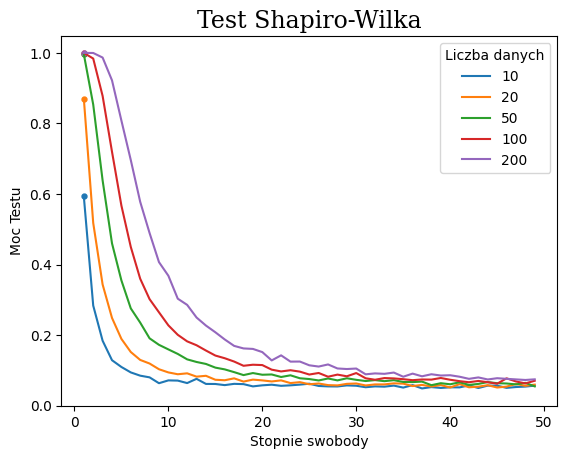

In [65]:
# Tworzę podstawkę do wykresu 
wykres_shapiro = plt.figure()


# Dodaje dane do wykresu 
for i,moc in enumerate(moc_shapiro):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    # Dodaję punkt dla pierwszego elementu
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 


# Czcionka dla tytulu
font_title = {'family' :'serif','size':17}

# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Shapiro-Wilka",fontdict=font_title)
plt.legend(title="Liczba danych")
plt.ylim(0)
plt.show()

### Wnioski

Ogólne: Wraz ze wzrostem liczby danych wzrasta także moc testu, aczkolwiek wraz ze wzrostem stopni liczby swobody w rozkładzie t-studenta moc testu spada i dąży do wartości 0.05(co jest równe poziomowi istotności ustalonemu dla tego tesu). Z wykresu widzimy, że moc testu słabnie hiperbolicznie, dla stopnii swobody > 30, możemy zauważyć, że liczba danych przestaje mieć znaczenie, a dla stopni swobody > 45, liczba danych nie ma już żadnego znaczenia dla mocy testu.  


### Test Kołgomorowa

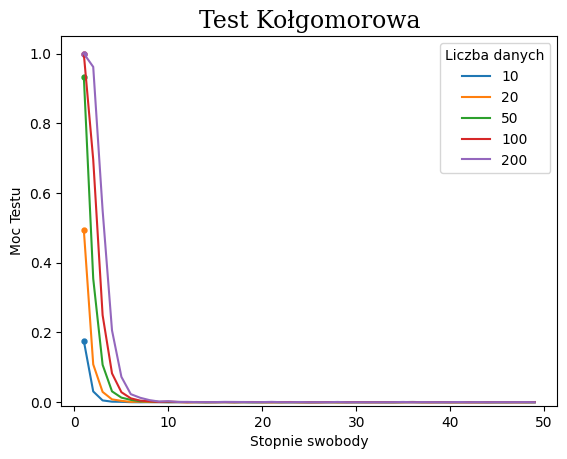

In [63]:
# Tworzę wykres

wykres_kolgo = plt.figure()

# Dodaje dane do wykres
for i,moc in enumerate(moc_kolgom):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 



# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Kołgomorowa",fontdict=font_title)
plt.legend(title="Liczba danych")
plt.ylim(-0.01)
plt.show()

### Test Chi-kwadrat

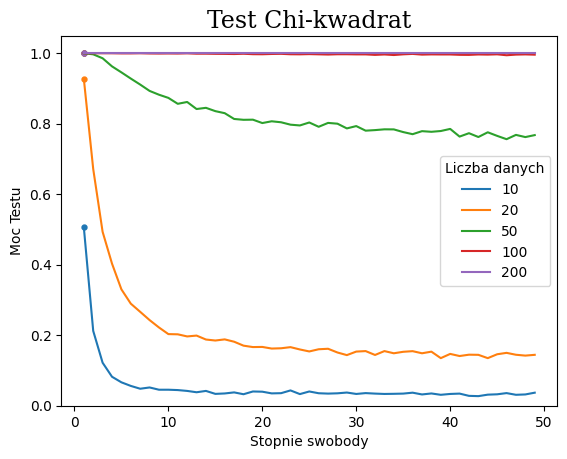

In [64]:
# Tworzę wykres

wykres_chi = plt.figure()

# Dodaje dane do wykresu
for i,moc in enumerate(moc_chi):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 

# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Chi-kwadrat",fontdict=font_title)
plt.legend(title="Liczba danych",loc="center right")
plt.ylim(0,)
plt.show()